<a href="https://colab.research.google.com/github/UrielMendoza/Curso-RV-python/blob/master/Miercoles_resuelto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


**Reproyección gdalwarp**

In [16]:
from osgeo import gdal
ds = gdal.Open('/content/drive/My Drive/Curso-RV-python/ndwi.tif')
gdal.Warp('ndwi_UTM.tif',ds,options=gdal.WarpOptions(dstSRS='EPSG:32614'))

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7f938e086f00> >

# **Introducción a Vectorial (Shapely Geopandas)**







**Shapely**

Shapely es un paquete de Python con licencia BSD para la manipulación y el análisis de objetos geométricos planos. Se basa en las bibliotecas GEOS (el motor de PostGIS ) y JTS (desde las cuales se transfiere GEOS), ampliamente implementadas . Shapely no se preocupa por los formatos de datos o los sistemas de coordenadas, pero puede integrarse fácilmente con los paquetes que sí lo están

In [0]:
from shapely.geometry import Point,LineString,LinearRing,Polygon,MultiLineString,MultiPoint,MultiPolygon 

Punto

In [45]:
punto = Point(1,-1)
type(punto)

shapely.geometry.point.Point

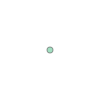

In [46]:
punto

Coordenadas

In [48]:
punto.x
punto.y

-1.0

Distancia

In [52]:
punto.distance(Point(2,3))


4.123105625617661

Union

In [0]:
punto.union(Point(1,0))
type(punto.union(Point(1,0)))
multiPoint = punto.union(Point(1,0))

Multipoint

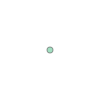

In [65]:
len(multiPoint)
multiPoint[0]
multiPoint[1]

Buffer

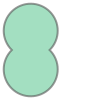

In [71]:
punto.buffer(10)
type(punto.buffer(10))
multiPoint.buffer(0.7)

Linea

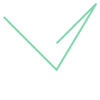

In [80]:
linea = LineString([(1,2),(2,3),(4,5),(1,0),(-3,4)])
linea

Perimetro

In [91]:
linea.bounds
linea.length

15.730446831456966

Distancia

In [92]:
linea.distance(Point(10,10))

7.810249675906654

Buffer

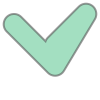

In [95]:
linea.buffer(1)

LineRing

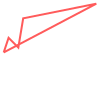

In [98]:
lineaRing = LinearRing([(1,0),(2,3),(4,1),(5,7),(20,10)])
lineaRing

In [100]:
lineaRing.is_closed

True

Buffer

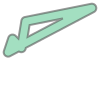

In [101]:
lineaRing.buffer(1)

Poligono

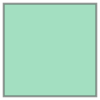

In [104]:
poli = Polygon([(0,0),(1,0),(1,1),(0,1),(0,0)])
poli

Area

In [105]:
poli.area

1.0

Perimetro

In [106]:
poli.length

4.0

Centroide

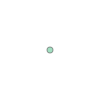

In [138]:
poli.centroid

Contorno

In [115]:
poli.exterior
type(poli.exterior)
poli.exterior.xy
poli.exterior.xy[0][0]

0.0

Buffer

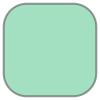

In [117]:
poli.buffer(0.5)

### Manejo de Geodataframe

**Geopandas**

GeoPandas es un proyecto de código abierto para facilitar el trabajo con datos geoespaciales en python. GeoPandas extiende los tipos de datos utilizados por los pandas para permitir operaciones espaciales en tipos geométricos. Las operaciones geométricas se realizan por bien proporcionado . Geopandas depende además de fiona para acceder a los archivos y descartes y matplotlib para trazar.

Instalacion

In [119]:
!pip install geopandas

     |████████████████████████████████| 921kB 4.9MB/s 
     |████████████████████████████████| 10.1MB 31.8MB/s 
     |████████████████████████████████| 11.8MB 31.5MB/s 


Importación

In [0]:
import geopandas as gpd

Apertura

In [0]:
df = gpd.read_file('/content/drive/My Drive/Curso-RV-python/muni_2018gw/muni_2018gw.shp')

Inspección

In [125]:
df

,CVE_ENT,CVE_MUN,CVEGEO,NOM_ENT,AREA,PERIMETER,NOM_MUN,COV_,COV_ID,geometry
0,01,001,01001,Aguascalientes,116635.92455,1166.35925,Aguascalientes,0,1,"POLYGON ((-102.09775 22.02325, -102.09857 22.0..."
1,01,002,01002,Aguascalientes,54337.42654,543.37427,Asientos,1,2,"POLYGON ((-101.99941 22.21951, -101.99940 22.2..."
2,01,003,01003,Aguascalientes,92335.78320,923.35783,Calvillo,2,3,"POLYGON ((-102.57625 21.96778, -102.57626 21.9..."
3,01,004,01004,Aguascalientes,12838.35453,128.38355,CosÃ­o,3,4,"POLYGON ((-102.25320 22.37449, -102.25239 22.3..."
4,01,005,01005,Aguascalientes,49989.50926,499.89509,JesÃºs MarÃ­a,4,5,"POLYGON ((-102.31034 22.03716, -102.30653 22.0..."
...,...,...,...,...,...,...,...,...,...,...
2458,32,054,32054,Zacatecas,37142.59872,371.42599,Villa Hidalgo,2458,2459,"POLYGON ((-101.65599 22.51381, -101.65586 22.5..."
2459,32,055,32055,Zacatecas,215650.56021,2156.50560,Villanueva,2459,2460,"POLYGON ((-102.69428 22.62230, -102.69476 22.6..."
2460,32,056,32056,Zacatecas,43678.57090,436.78571,Zacatecas,2460,2461,"POLYGON ((-102.58542 22.81149, -102.58541 22.8..."
2461,32,057,32057,Zacatecas,21844.70068,218.44701,Trancoso,2461,2462,"POLYGON ((-102.24610 22.73451, -102.24615 22.7..."


In [126]:
df.head

<bound method NDFrame.head of      CVE_ENT CVE_MUN  ... COV_ID                                           geometry
0         01     001  ...      1  POLYGON ((-102.09775 22.02325, -102.09857 22.0...
1         01     002  ...      2  POLYGON ((-101.99941 22.21951, -101.99940 22.2...
2         01     003  ...      3  POLYGON ((-102.57625 21.96778, -102.57626 21.9...
3         01     004  ...      4  POLYGON ((-102.25320 22.37449, -102.25239 22.3...
4         01     005  ...      5  POLYGON ((-102.31034 22.03716, -102.30653 22.0...
...      ...     ...  ...    ...                                                ...
2458      32     054  ...   2459  POLYGON ((-101.65599 22.51381, -101.65586 22.5...
2459      32     055  ...   2460  POLYGON ((-102.69428 22.62230, -102.69476 22.6...
2460      32     056  ...   2461  POLYGON ((-102.58542 22.81149, -102.58541 22.8...
2461      32     057  ...   2462  POLYGON ((-102.24610 22.73451, -102.24615 22.7...
2462      32     058  ...   2463  POLYGON ((-1

In [127]:
df.columns

Index(['CVE_ENT', 'CVE_MUN', 'CVEGEO', 'NOM_ENT', 'AREA', 'PERIMETER',
       'NOM_MUN', 'COV_', 'COV_ID', 'geometry'],
      dtype='object')

Acceso a columas

In [133]:
df['AREA']
type(df['AREA'])

pandas.core.series.Series

In [131]:
df.AREA

0       116635.92455
1        54337.42654
2        92335.78320
3        12838.35453
4        49989.50926
            ...     
2458     37142.59872
2459    215650.56021
2460     43678.57090
2461     21844.70068
2462     27566.66479
Name: AREA, Length: 2463, dtype: float64

Calculos geometricos

Extremos

In [134]:
df.bounds

,minx,miny,maxx,maxy
0,-102.583143,21.622266,-102.064508,22.075343
1,-102.219330,21.958388,-101.854160,22.306073
2,-102.874177,21.715609,-102.529619,22.106530
3,-102.378443,22.281557,-102.238848,22.459590
4,-102.598873,21.806360,-102.264751,22.062767
...,...,...,...,...
2458,-101.846959,22.292948,-101.586541,22.520422
2459,-103.154843,21.994811,-102.601107,22.675870
2460,-102.849731,22.617180,-102.539319,22.841472
2461,-102.402920,22.676173,-102.217318,22.834525


area

In [136]:
df.area

0       0.102900
1       0.048057
2       0.081518
3       0.011375
4       0.044144
          ...   
2458    0.032921
2459    0.190977
2460    0.038812
2461    0.019414
2462    0.024265
Length: 2463, dtype: float64

perimetro

In [137]:
df.length

0       2.420713
1       1.804404
2       1.610751
3       0.690669
4       1.541208
          ...   
2458    1.126578
2459    3.312681
2460    1.316645
2461    0.625554
2462    1.019240
Length: 2463, dtype: float64

distancia

In [139]:
df.distance(Point(-103,34))

0       11.955565
1       11.730405
2       11.897589
3       11.561723
4       11.954658
          ...    
2458    11.553401
2459    11.326155
2460    11.160938
2461    11.192874
2462    12.414690
Length: 2463, dtype: float64

buffer

In [140]:
df.buffer(0.5)

0       POLYGON ((-102.18599 21.14268, -102.19878 21.1...
1       POLYGON ((-102.71782 22.14371, -102.71780 22.1...
2       POLYGON ((-102.39754 21.27959, -102.39762 21.2...
3       POLYGON ((-102.80705 22.61727, -102.80082 22.6...
4       POLYGON ((-103.09472 21.92536, -103.09510 21.9...
                              ...                        
2458    POLYGON ((-102.28267 22.59913, -102.28223 22.6...
2459    POLYGON ((-103.64800 22.15303, -103.64634 22.1...
2460    POLYGON ((-103.33280 22.93967, -103.33152 22.9...
2461    POLYGON ((-102.89881 22.82754, -102.89755 22.8...
2462    POLYGON ((-103.97532 21.39639, -103.98075 21.4...
Length: 2463, dtype: geometry

Localizacion por pocision

In [147]:
df.iloc[2]

CVE_ENT                                                     01
CVE_MUN                                                    003
CVEGEO                                                   01003
NOM_ENT                                         Aguascalientes
AREA                                                   92335.8
PERIMETER                                              923.358
NOM_MUN                                               Calvillo
COV_                                                         2
COV_ID                                                       3
geometry     POLYGON ((-102.5762505699791 21.96778072040316...
Name: 2, dtype: object

Graficacion

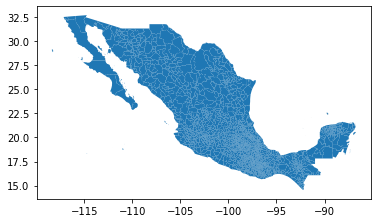

In [148]:
df.plot()

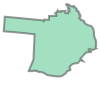

In [159]:
df.iloc[0][9]
df['geometry'][0]
df['geometry'][45]


In [158]:
df['NOM_MUN'][45]

'JimÃ©nez'

### Depuración de datos vectoriales

In [179]:
df[df['NOM_ENT'] == 'Oaxaca']
 

,CVE_ENT,CVE_MUN,CVEGEO,NOM_ENT,AREA,PERIMETER,NOM_MUN,COV_,COV_ID,geometry
1003,20,001,20001,Oaxaca,12636.59378,126.36594,Abejones,1003,1004,"POLYGON ((-96.62002 17.55819, -96.61878 17.558..."
1004,20,002,20002,Oaxaca,75218.99018,752.18990,AcatlÃ¡n de PÃ©rez Figueroa,1004,1005,"POLYGON ((-96.31955 18.35826, -96.31990 18.358..."
1005,20,003,20003,Oaxaca,7644.41658,76.44417,AsunciÃ³n Cacalotepec,1005,1006,"POLYGON ((-95.88156 17.04301, -95.88180 17.042..."
1006,20,004,20004,Oaxaca,8357.92705,83.57927,AsunciÃ³n Cuyotepeji,1006,1007,"POLYGON ((-97.68006 17.95012, -97.67982 17.950..."
1007,20,005,20005,Oaxaca,66097.67083,660.97671,AsunciÃ³n Ixtaltepec,1007,1008,"POLYGON ((-94.88605 16.83564, -94.88606 16.833..."
...,...,...,...,...,...,...,...,...,...,...
1568,20,566,20566,Oaxaca,19831.76453,198.31765,San Mateo Yucutindoo,1568,1569,"POLYGON ((-97.22229 16.86711, -97.22263 16.866..."
1569,20,567,20567,Oaxaca,30513.42470,305.13425,ZapotitlÃ¡n Lagunas,1569,1570,"POLYGON ((-98.33179 17.87998, -98.34925 17.859..."
1570,20,568,20568,Oaxaca,4377.37100,43.77371,ZapotitlÃ¡n Palmas,1570,1571,"POLYGON ((-97.81929 17.91474, -97.81800 17.914..."
1571,20,569,20569,Oaxaca,8383.67000,83.83670,Santa InÃ©s de Zaragoza,1571,1572,"POLYGON ((-97.10571 17.31311, -97.10522 17.312..."


Graficacion

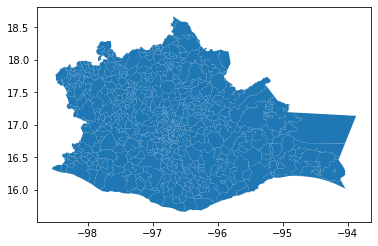

In [180]:
df[df['NOM_ENT'] == 'Oaxaca'].plot()

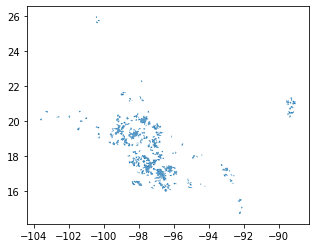

In [182]:
df[df['AREA'] < 10000].plot()

In [0]:
df[df[] < 10000].plot()